<h1>
<center>CFRM 421/521, Spring 2023</center>
</h1>

<h1>
<center>Ryan Milgrim</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Wednesday, May 27, 2024, 11:59 PM**


* Total marks: 43


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [12 marks]

Consider the original source of the California housing data (used in Homework 2) in Scikit-Learn.  The data is obtained and split using the code below, where we split off 20% as the test set, and then split off 20% of the training set as a validation set, and keep the remaining 80% of the training set as the actual training set. The following code creates the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with a normalization layer as the first layer (`tf.keras.layers.Normalization(input_shape=X_train.shape[1:])`), and one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set. In the `.compile()` method, use `loss="mse"`.

**Solution**
<p>
Model B performs better. I believe that model A suffers from an exploding gradient problem which is why every prediction on the validation set scores as a 0. 
<p\>


In [2]:
from tensorflow import keras

# Define input shape
input_shape = X_train.shape[1:]

# Model A uses the He initialization and the ReLU activation function
model_A = keras.models.Sequential([
    keras.layers.Normalization(input_shape=input_shape),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="relu", kernel_initializer="he_normal")
])

# Model B's uses the default kernel initializer (Glorot) and no activation function
model_B = keras.models.Sequential([
    keras.layers.Normalization(input_shape=input_shape),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

# Compile models A and B with the same loss and optimizer
model_A.compile(loss="mse", optimizer="nadam")
model_B.compile(loss="mse", optimizer="nadam")

# Train for 30 epochs
history_A = model_A.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history_B = model_B.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/30


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7255 - val_loss: 5.7567
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6148 - val_loss: 5.7567
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5697 - val_loss: 5.7567
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6781 - val_loss: 5.7567
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5541 - val_loss: 5.7567
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6473 - val_loss: 5.7567
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5340 - val_loss: 5.7567
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6457 - val_loss: 5.7567
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5385 - val_loss: 5.7567
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7385 - val_loss: 5.7567
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5543 - val_loss: 5.7567
Epoch 12/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.

In [3]:
# Report the MSE on the validation set
print("Model A MSE: ", model_A.evaluate(X_valid, y_valid))
print("Model B MSE: ", model_B.evaluate(X_valid, y_valid))

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 5.8433
Model A MSE:  5.756706237792969
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.4155
Model B MSE:  1.9966514110565186


## (b) [6 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) on the textbook website using Keras Tuner. You will need to install the package `keras_tuner` if you don't already have it.

Then use Keras Tuner to do a randomized search to search for the best hyperparameters. Do the randomized search over the first 5000 observations of the training set. Use 20 iterations, 20 epochs per iteration. Use the same network architecture as (a) except where otherwise specified below. Use no activation function for the output layer. Use a seed of 42, and the objective is clearly to minimize validation loss. The hyperparameters to search over are:

* Hidden layers: 1 to 5.
* Number of neurons per layer: 1 to 100.
* Learning rate: 1e-4 to 1e-2 using log sampling.
* $\ell_2$ regularizers with `l2` value: 1e-4 to 100 using log sampling.
* Optimizer: `tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)` and `tf.keras.optimizers.Nadam(learning_rate=learning_rate)`.

Print the best hyperparameter. (You can ignore any warning message you may get).

In [4]:
import keras_tuner as kt


def model_builder(hp):

    # Define the model
    model = keras.models.Sequential()    

    # Input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Normalization())

    # Hyperparameters
    hp_hidden_layers = hp.Int("hidden_layers", min_value=1, max_value=5)
    hp_neurons = hp.Int("neurons", min_value=1, max_value=100)
    hp_learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    hp_l2 = hp.Float("l2", min_value=1e-4, max_value=100, sampling="log")


    # Add hidden layers
    for i in range(hp_hidden_layers):
        model.add(
            keras.layers.Dense(
                hp_neurons,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=keras.regularizers.l2(hp_l2)
            ))

    # Output layer
    model.add(keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(hp_l2)))

    # Set the optimizer
    hp_optimizer = hp.Choice("optimizer", ["SGD", "Nadam"])
    if hp_optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate, clipnorm=1.0)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=hp_learning_rate)

    # Compile the model
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Create the tuner 
tuner = kt.RandomSearch(
    model_builder, 
    objective="val_loss",
    directory="my_dir",
    project_name="HW4_Part1",
    seed=42,
    overwrite=True
)

# Search for the best hyperparameters
tuner.search(X_train[:5000], y_train[:5000], epochs=20, validation_data=(X_valid, y_valid))

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Trial 10 Complete [00h 00m 07s]
val_loss: 182.4533233642578

Best val_loss So Far: 1.5484600067138672
Total elapsed time: 00h 01m 22s


Epoch 1/20


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 23 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4371 - val_loss: 1.4446
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4385 - val_loss: 1.3451
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4113 - val_loss: 1.3109
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3500 - val_loss: 1.3447
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3768 - val_loss: 1.3007
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3645 - val_loss: 1.2923
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3247 - val_loss: 1.2774
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3299 - val_loss: 1.3658
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3236 - val_loss: 1.2806
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2926 - val_loss: 1.2753
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2852 - val_loss: 1.2229
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.

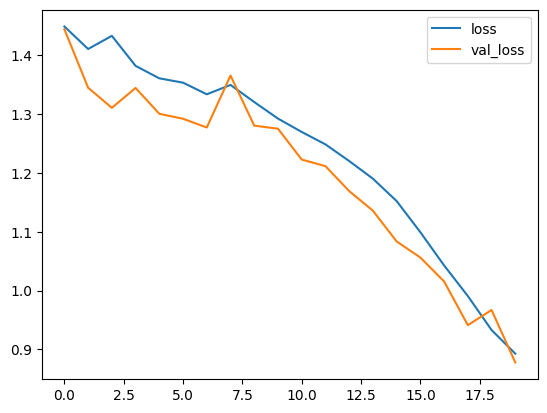

In [5]:
# Train the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train_tmp, y_train_tmp, epochs=20, validation_data=(X_test, y_test))

# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters:\n{best_hps.values}")

# Plot the learning curves
plt.plot(best_model.history.history["loss"], label="loss")
plt.plot(best_model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## (c) [2 marks]

For the best model in (b), train the model on the full training data for 200 epochs. Plot the learning curve. Does it look like the model is overfitting?

Epoch 1/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4802 - val_loss: 1.3956
Epoch 2/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4324 - val_loss: 1.4114
Epoch 3/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4476 - val_loss: 1.3241
Epoch 4/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3703 - val_loss: 1.5300
Epoch 5/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4485 - val_loss: 1.3013
Epoch 6/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3880 - val_loss: 1.2901
Epoch 7/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3384 - val_loss: 1.2851
Epoch 8/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3531 - val_loss: 1.3373
Epoch 9/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3033 - val_loss: 1.4322
Epoch 10/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3427 - val_loss: 1.2586
Epoch 11/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3253 - val_loss: 1.2392
Epoch 12/200
516/516 ━━━━━━━━━━━━━━━━━━━━

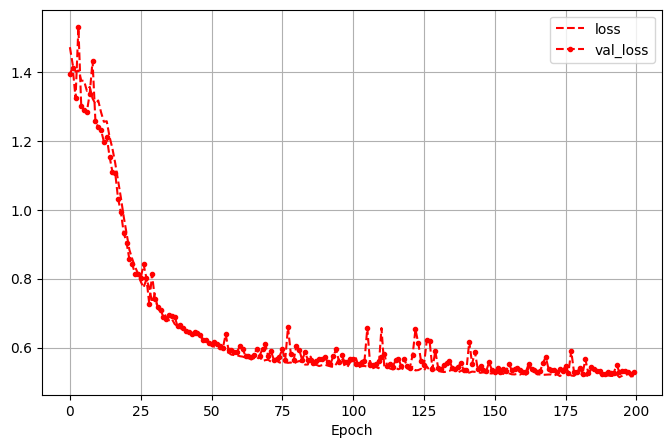

In [6]:
# Train the best model
best_model = tuner.get_best_models(num_models=1)[0]
history = best_model.fit(X_train_tmp, y_train_tmp, epochs=200, validation_data=(X_test, y_test))

# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters:\n{best_hps.values}")

# Plot the learning curves
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


**[Add your solution here]**

# 2. Binary classification DNN [17 marks]

Consider the [Portuguese Bank Marketing Data Set](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv) available at Kaggle. Download the `bank_cleaned.csv` file or from [Canvas](https://canvas.uw.edu/files/106328167/download?download_frd=1). Here we want to predict the success or failure of a bank marketing campaign using phone calls to promote a term deposit product. The target variable is `response_binary`.

The following code preprocesses the data. The day and month have been converted into cyclical features(1st day of the month has equal distance to the 2nd and the 31st).

In [7]:
df = pd.read_csv("bank_cleaned.csv")

month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
day_rad = (df["day"] - 1) * (2 * np.pi / 31)
month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)
df["day_sin"] = np.sin(day_rad)
df["day_cos"] = np.cos(day_rad)
df["month_sin"] = np.sin(month_rad)
df["month_cos"]  = np.cos(month_rad)
df.drop(columns=["Unnamed: 0", "month", "day", "response"], axis=1, inplace=True)
df.head()

C:\Users\ryanm\AppData\Local\Temp\ipykernel_27012\648047190.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response_binary,day_sin,day_cos,month_sin,month_cos
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
1,44,technician,single,secondary,no,29,yes,no,2.52,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
3,35,management,married,tertiary,no,231,yes,no,2.32,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
4,28,management,single,tertiary,no,447,yes,yes,3.62,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5


In [8]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_set_tmp, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, valid_set = train_test_split(train_set_tmp, test_size=0.2, random_state=42)

X_train_raw = train_set.drop("response_binary", axis=1).copy()
y_train = train_set["response_binary"].copy()
X_valid_raw = valid_set.drop("response_binary", axis=1).copy()
y_valid = valid_set["response_binary"].copy()
X_test_raw = test_set.drop("response_binary", axis=1).copy()
y_test = test_set["response_binary"].copy()

num_attribs = list(X_train_raw._get_numeric_data().columns)
cat_attribs = list(set(X_train_raw.columns) - set(num_attribs))

cat_attribs_ord = ['default', 'housing', 'loan']
cat_attribs_hot = ['job', 'marital', 'education', 'poutcome']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat_hot", OneHotEncoder(), cat_attribs_hot),
        ("cat_ord", OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes']]), cat_attribs_ord)
    ])

X_train = full_pipeline.fit_transform(X_train_raw)
X_valid = full_pipeline.transform(X_valid_raw)
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

In the next part you will build and fit a DNN with 4 hidden layers of 100 neurons each. Use the following specifications:

(i) He initialization and the Swish activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]`.

Explain why the choices (i), (ii), and (iii) are justified.

Also, state the proportion of sucesses in the training data.

**Solution**

**(i)** The Swish activation function is a great choice for complex tasks like predicting the success or failure from a market campaign. He Initialization is helpful when training models with mutiple layers as the outputs of each layer are typically not standardized, the exception is SELU, but this is helpful for Swish. 

**(ii)** The output layer with a single sigmoid activation is resonable for a binary classification problem. 

**(iii)** Again, binary crossentrophy is a reasonable function given that our target is a boolean value. AUC is a useful metric, however, this parameter is only used to gauage the performance of the model, for binary classification it is a good choice. 

In [9]:
# Define the model
model = keras.models.Sequential()

# Input layer
model.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

# Output layer
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", metrics=["AUC"])

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Calculate the proportion of successes in the training
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5)

# Report the proportion of successes in the training data
print(
    "Proportion of successes in the training data: ",
    np.mean(y_train_pred_binary == y_train.values.reshape(-1, 1))
)

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8506 - loss: 0.2602 - val_AUC: 0.9003 - val_loss: 0.2321
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9069 - loss: 0.2187 - val_AUC: 0.9097 - val_loss: 0.2161
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9176 - loss: 0.2076 - val_AUC: 0.9130 - val_loss: 0.2149
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9132 - loss: 0.2116 - val_AUC: 0.9091 - val_loss: 0.2159
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9233 - loss: 0.2026 - val_AUC: 0.9079 - val_loss: 0.2189
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9253 - loss: 0.2030 - val_AUC: 0.9118 - val_loss: 0.2151
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9281 - loss: 0.1950 - val_AUC: 0.9112 - val_loss: 0.2127
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9319 - loss: 0.1879 - val_AUC: 0.9151 - val_loss: 0.2162
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AU

## (b) [3 marks]

Train the model in (a) for 30 epochs and use exponential scheduling using the function below (`lr0=0.01`, `s=20`) and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

**Solution** The Model is under fitting to the data by the charts

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9627 - loss: 0.1416 - val_AUC: 0.8878 - val_loss: 0.2703
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9639 - loss: 0.1392 - val_AUC: 0.8789 - val_loss: 0.2927
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9691 - loss: 0.1285 - val_AUC: 0.8721 - val_loss: 0.3098
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9708 - loss: 0.1242 - val_AUC: 0.8660 - val_loss: 0.3313
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9730 - loss: 0.1190 - val_AUC: 0.8620 - val_loss: 0.3489
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9741 - loss: 0.1164 - val_AUC: 0.8631 - val_loss: 0.3616
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9700 - loss: 0.1275 - val_AUC: 0.8671 - val_loss: 0.3363
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9735 - loss: 0.1178 - val_AUC: 0.8626 - val_loss: 0.3772
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AU

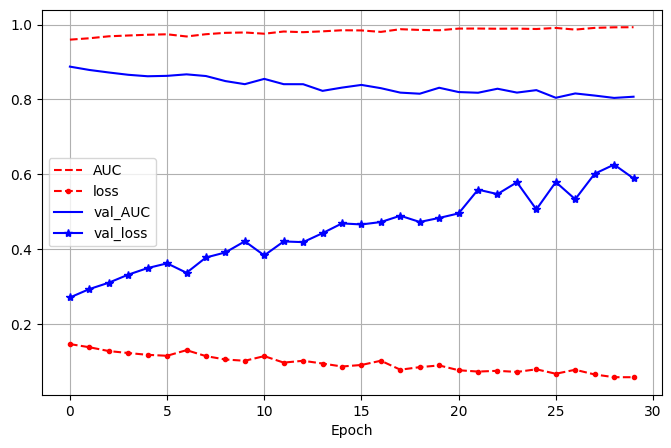

In [10]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)

# Reset the session
reset_session()

# helpful function to build the optimizer
def build_nag_optimizer(lr=0.01, momentum=0.9, nesterov=True):
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=lr,
        decay_steps=20,
        decay_rate=0.1
    )
    return keras.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov=nesterov)

# Train the model
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# Plot the learning curves
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()


## (c) [8 marks]

Fit separate models using the same specification as in (b) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.0002`,

(iv) dropout with probability 0.02,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (b), and for each of the models here comment on whether it is better than the model in (b).

**Solution** Every model is performing better than Model B by AUC with the exception of model ii which only makes use of early stopping. 

In [11]:
# Create a dictionary to store the models starting with model (b)
models = {'B': model}
          
# Build Model 1
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model 1 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[1] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8200 - loss: 0.2954 - val_AUC: 0.8755 - val_loss: 0.2422
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9013 - loss: 0.2239 - val_AUC: 0.8799 - val_loss: 0.2404
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9146 - loss: 0.2108 - val_AUC: 0.8779 - val_loss: 0.2441
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9253 - loss: 0.1992 - val_AUC: 0.8721 - val_loss: 0.2537
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9345 - loss: 0.1877 - val_AUC: 0.8631 - val_loss: 0.2684
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9429 - loss: 0.1761 - val_AUC: 0.8519 - val_loss: 0.2885
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9510 - loss: 0.1641 - val_AUC: 0.8411 - val_loss: 0.3155
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9584 - loss: 0.1514 - val_AUC: 0.8269 - val_loss: 0.3500
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9658 -

In [12]:

# Build Model 2 with early stopping
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Set the early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10, mode="max", monitor="val_auc"
)

# Complie model 2 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping])
models[2] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8253 - loss: 0.2801 - val_AUC: 0.8958 - val_loss: 0.2278
Epoch 2/20
 73/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9187 - loss: 0.2038

c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9061 - loss: 0.2189 - val_AUC: 0.9023 - val_loss: 0.2221
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9121 - loss: 0.2129 - val_AUC: 0.9052 - val_loss: 0.2191
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9162 - loss: 0.2089 - val_AUC: 0.9079 - val_loss: 0.2170
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9200 - loss: 0.2054 - val_AUC: 0.9097 - val_loss: 0.2153
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9230 - loss: 0.2023 - val_AUC: 0.9112 - val_loss: 0.2139
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9256 - loss: 0.1995 - val_AUC: 0.9125 - val_loss: 0.2129
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9276 - loss: 0.1969 - val_AUC: 0.9133 - val_loss: 0.2122
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9294 - loss: 0.1946 - val_AUC: 0.9139 - val_loss: 0.2117
Epoch 10/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9315 

In [13]:
# Build Model 3 with l2 regularization on the hidden layers
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model 1 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[3] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8189 - loss: 0.4519 - val_AUC: 0.8960 - val_loss: 0.3786
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9051 - loss: 0.3692 - val_AUC: 0.9015 - val_loss: 0.3646
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9104 - loss: 0.3555 - val_AUC: 0.9049 - val_loss: 0.3535
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9138 - loss: 0.3440 - val_AUC: 0.9068 - val_loss: 0.3439
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9164 - loss: 0.3341 - val_AUC: 0.9084 - val_loss: 0.3355
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9184 - loss: 0.3252 - val_AUC: 0.9094 - val_loss: 0.3279
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9200 - loss: 0.3171 - val_AUC: 0.9105 - val_loss: 0.3210
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9213 - loss: 0.3097 - val_AUC: 0.9113 - val_loss: 0.3146
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AU

In [14]:
# Build Model 4 with Dropout of 0.02
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model 4 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
dropout_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[4] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8254 - loss: 0.2819 - val_AUC: 0.8966 - val_loss: 0.2273
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8997 - loss: 0.2247 - val_AUC: 0.9017 - val_loss: 0.2222
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9072 - loss: 0.2184 - val_AUC: 0.9065 - val_loss: 0.2189
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9106 - loss: 0.2147 - val_AUC: 0.9069 - val_loss: 0.2183
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9115 - loss: 0.2140 - val_AUC: 0.9110 - val_loss: 0.2143
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9150 - loss: 0.2100 - val_AUC: 0.9120 - val_loss: 0.2132
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9184 - loss: 0.2069 - val_AUC: 0.9135 - val_loss: 0.2115
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9205 - loss: 0.2051 - val_AUC: 0.9151 - val_loss: 0.2105
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AU

In [15]:
# Build Model 5 with early stopping and l2 regularization on the hidden layers
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(1, activation="sigmoid")
])

# Set the early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10, mode="max", monitor="val_auc"
)

# Complie model 2 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping])
models[5] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8371 - loss: 0.4297 - val_AUC: 0.8995 - val_loss: 0.3740
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9056 - loss: 0.3655 - val_AUC: 0.9057 - val_loss: 0.3594
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9121 - loss: 0.3513 - val_AUC: 0.9088 - val_loss: 0.3485
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9156 - loss: 0.3402 - val_AUC: 0.9109 - val_loss: 0.3393
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9179 - loss: 0.3305 - val_AUC: 0.9121 - val_loss: 0.3310
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9201 - loss: 0.3219 - val_AUC: 0.9135 - val_loss: 0.3235
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9219 - loss: 0.3140 - val_AUC: 0.9144 - val_loss: 0.3167
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9230 - loss: 0.3069 - val_AUC: 0.9150 - val_loss: 0.3105
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AU

In [16]:
# Build Model with Batch Normalization and Dropout
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[6] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7870 - loss: 0.3288 - val_AUC: 0.8748 - val_loss: 0.2520
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8909 - loss: 0.2323 - val_AUC: 0.8842 - val_loss: 0.2420
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9042 - loss: 0.2215 - val_AUC: 0.8880 - val_loss: 0.2395
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9114 - loss: 0.2139 - val_AUC: 0.8894 - val_loss: 0.2421
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9182 - loss: 0.2068 - val_AUC: 0.8854 - val_loss: 0.2494
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9238 - loss: 0.2004 - val_AUC: 0.8823 - val_loss: 0.2568
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9278 - loss: 0.1949 - val_AUC: 0.8822 - val_loss: 0.2611
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9381 - loss: 0.1828 - val_AUC: 0.8766 - val_loss: 0.2707
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

In [17]:
# Report the AUC metric for each model in models
for i, model in models.items():
    print(f"Model {i} AUC: ", model.evaluate(X_valid, y_valid, return_dict=True)["AUC"])

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8114 - loss: 0.6001
Model B AUC:  0.8073030710220337
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7562 - loss: 0.6865
Model 1 AUC:  0.7576432228088379
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9088 - loss: 0.2274
Model 2 AUC:  0.9067151546478271
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9193 - loss: 0.2675
Model 3 AUC:  0.9170677661895752
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9141 - loss: 0.2168
Model 4 AUC:  0.9153549671173096
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9193 - loss: 0.2673
Model 5 AUC:  0.9179370403289795
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8542 - loss: 0.3550
Model 6 AUC:  0.8405876159667969


## (d) [1 mark]

For the dropout model in (c)(iv) determine whether or not it is overfitting less than the model in (b).

<Axes: xlabel='Epoch'>

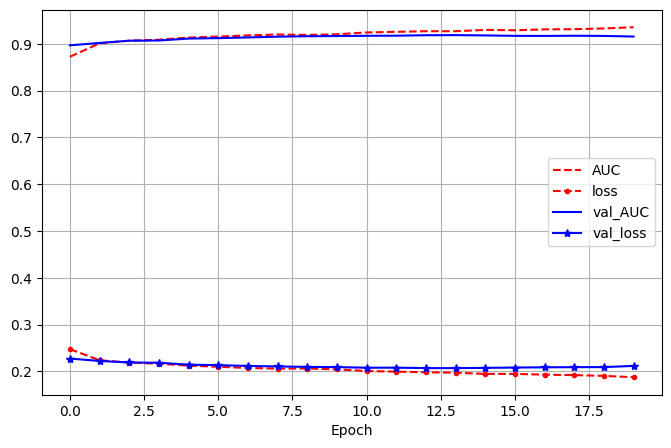

In [18]:
"""
The drop out model is performing well both in sample and out of sample.
It is not over fitting to the model.
"""

# Plot the learning curves for the dropout model
pd.DataFrame(dropout_history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)


## (e) [1 mark]

Of the models in (b) and (c), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (c)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

In [19]:
# I would choose model 4 with dropout of 0.02 as the best model.
for i, model in models.items():
    print(f"Model {i} AUC: ", model.evaluate(X_test, y_test, return_dict=True)["AUC"])

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8168 - loss: 0.6048
Model B AUC:  0.8224923610687256
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7885 - loss: 0.6474
Model 1 AUC:  0.7858176231384277
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9141 - loss: 0.2220
Model 2 AUC:  0.9194587469100952
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9187 - loss: 0.2692
Model 3 AUC:  0.9257876873016357
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9206 - loss: 0.2137
Model 4 AUC:  0.9255756139755249
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9194 - loss: 0.2686
Model 5 AUC:  0.926361620426178
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8509 - loss: 0.3604
Model 6 AUC:  0.8527922630310059


# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2023, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/106328118/download?download_frd=1).

In [20]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2023,1,1))

## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

**[Add your solution here]**

## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

In [21]:
movement_test = X_test[:,-1] < y_test.ravel()

C:\Users\ryanm\AppData\Local\Temp\ipykernel_27012\743529597.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  movement_test = X_test[:,-1] < y_test.ravel()


**[Add your solution here]**

## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

**[Add your solution here]**

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

**[Add your solution here]**